predicting turbine energy yield (TEY) using ambient variables as features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras import layers, models 
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [2]:
turbines = pd.read_csv('gas_turbines.csv')

In [164]:
turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
turbines.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
turbines.duplicated().sum()

0

In [11]:
turbines.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


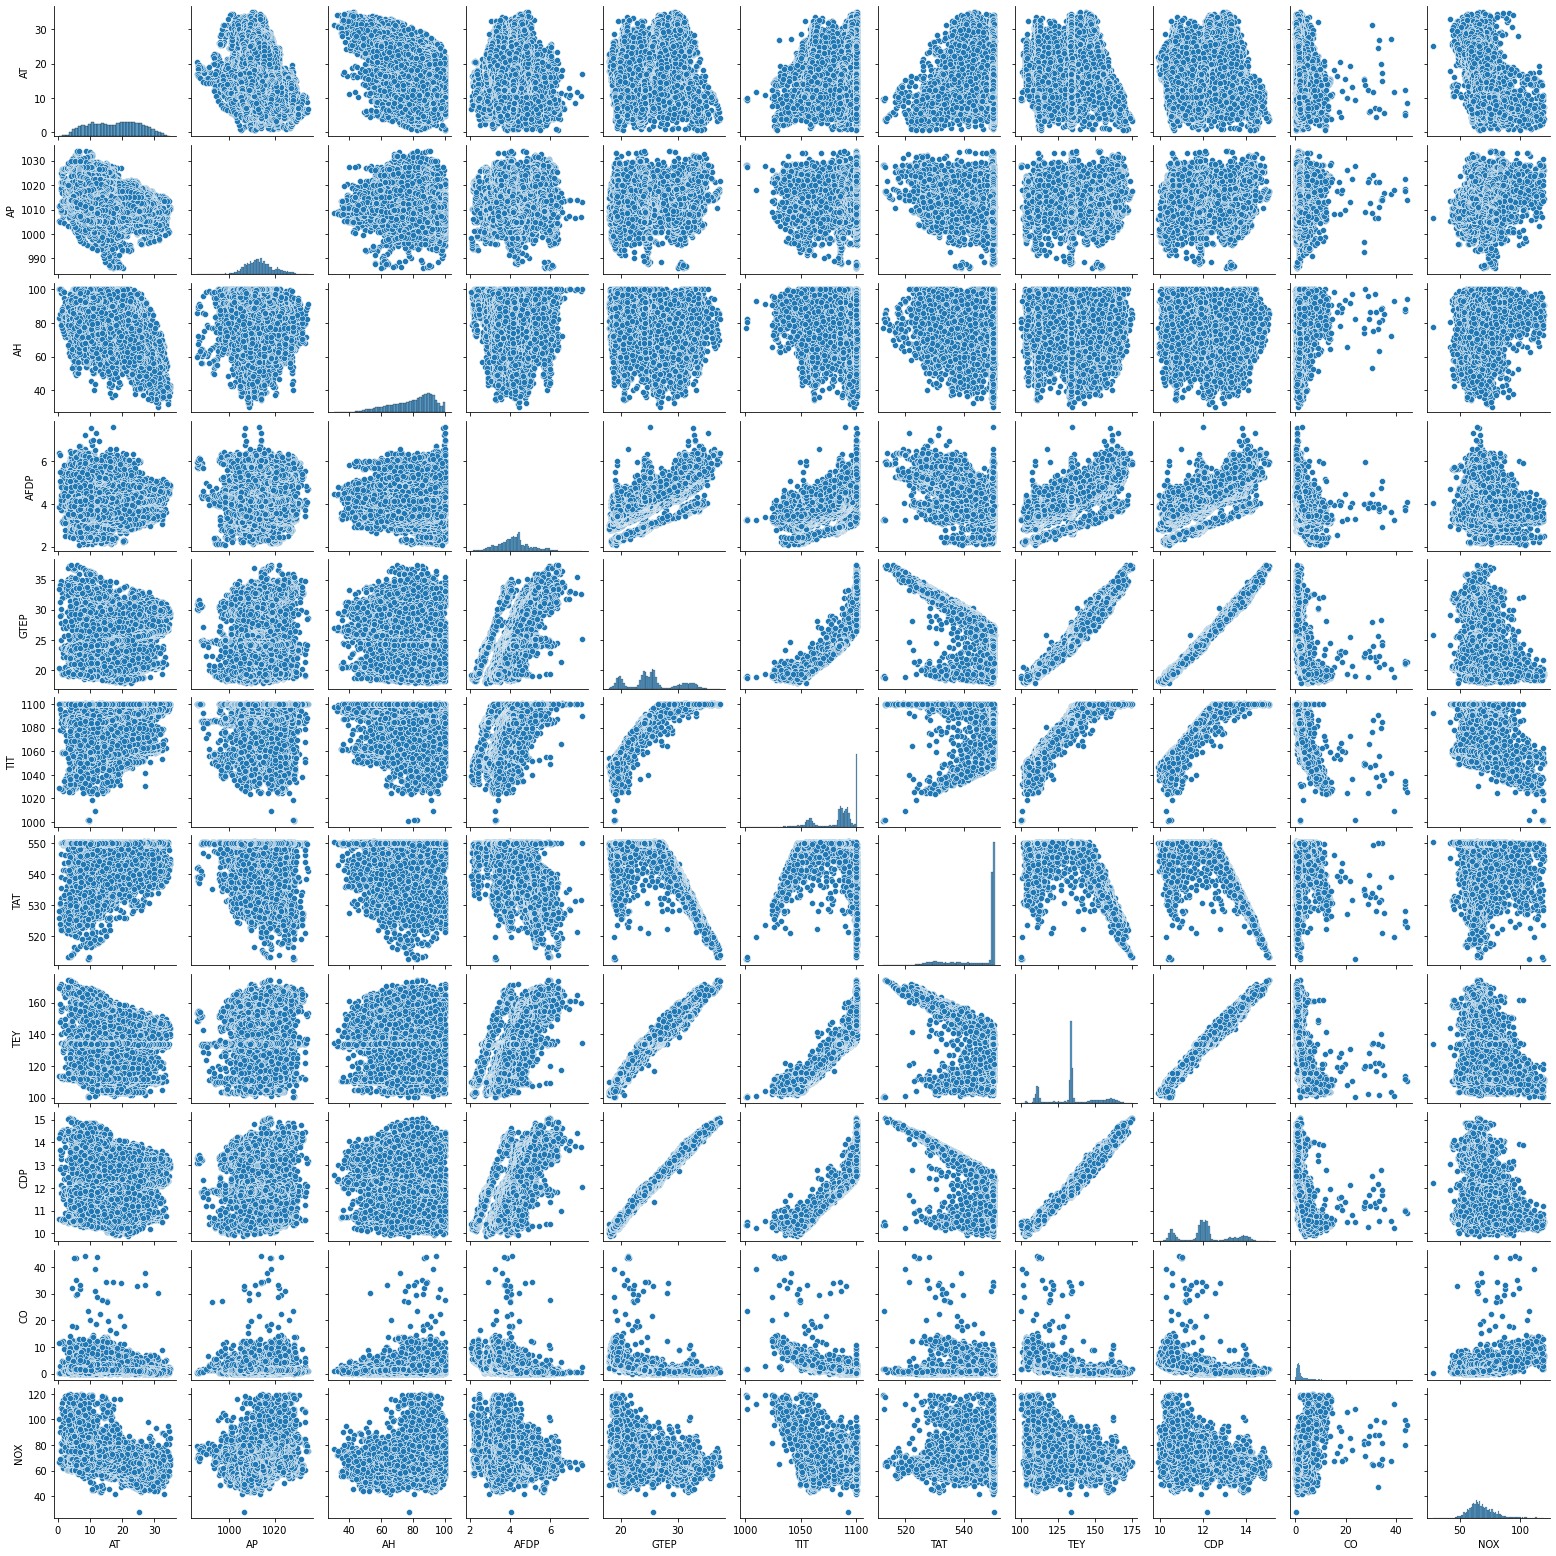

In [20]:
sns.pairplot(turbines, height=2)

In [3]:
X = turbines.drop('TEY', axis=1)
y = turbines['TEY']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
X_train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
10187,17.4200,1015.4,56.526,3.5327,24.659,1087.8,550.05,11.979,1.52160,73.865
581,10.3210,1029.1,84.519,5.7759,33.104,1100.2,528.33,14.082,1.93590,71.891
1090,8.9166,1017.7,94.937,6.2532,33.701,1099.9,527.26,14.081,0.58865,78.189
6753,14.3080,1020.8,86.602,2.2080,18.882,1053.2,548.95,10.472,4.96240,67.287
1467,17.6370,1004.7,61.288,4.9691,25.059,1087.9,549.88,11.957,1.05220,76.902
...,...,...,...,...,...,...,...,...,...,...
13123,23.1770,1017.4,73.491,3.2509,20.246,1061.2,549.96,10.831,2.67630,57.271
3264,29.7670,1012.5,66.533,4.2209,26.290,1093.9,549.98,12.222,1.77170,64.133
9845,12.4800,1016.7,72.020,4.1439,29.251,1099.8,537.65,13.503,0.88512,65.532
10799,26.2940,1011.1,65.623,3.5515,23.846,1080.9,550.27,11.598,1.10500,60.692


In [6]:
X_test

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
7052,15.3040,1000.3,65.933,3.0021,24.361,1085.2,549.86,11.896,1.27910,77.036
13849,16.3320,1020.6,57.919,4.9235,31.802,1100.0,531.67,13.820,1.15540,70.765
13112,27.6380,1017.0,57.860,4.1522,25.954,1094.5,550.37,12.241,1.11050,65.651
5268,23.7750,1009.3,86.774,4.3658,25.787,1092.0,550.04,12.181,1.79170,63.681
8720,7.6426,1013.2,82.689,4.0112,23.502,1083.7,550.12,11.731,1.56420,82.617
...,...,...,...,...,...,...,...,...,...,...
9973,13.4160,1010.1,100.130,3.2325,19.625,1054.1,547.37,10.601,4.76850,77.677
3539,27.5860,1009.3,77.724,4.1525,26.033,1092.3,550.45,12.048,1.59880,57.541
2180,17.3370,1003.6,82.099,5.0158,24.913,1086.1,550.14,11.825,0.67895,65.615
9596,13.6830,1014.7,86.376,4.4516,24.383,1087.2,549.41,12.011,1.48860,72.297


In [7]:
y_train

10187    133.66
581      160.99
1090     162.69
6753     110.01
1467     133.70
          ...  
13123    112.04
3264     133.80
9845     155.46
10799    126.28
2732     109.74
Name: TEY, Length: 12031, dtype: float64

In [8]:
y_test

7052     134.06
13849    155.98
13112    133.77
5268     134.02
8720     134.14
          ...  
9973     112.56
3539     133.74
2180     133.23
9596     134.71
5218     133.76
Name: TEY, Length: 3008, dtype: float64

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [187]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='linear'))

In [188]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

In [189]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
376/376 [==============================] - 9s 8ms/step - loss: 5547.9185 - mae: 54.0679 - mape: 40.2762 - val_loss: 258.5069 - val_mae: 12.4337 - val_mape: 9.3522
Epoch 2/50
376/376 [==============================] - 2s 5ms/step - loss: 170.3801 - mae: 9.7420 - mape: 7.3614 - val_loss: 113.5449 - val_mae: 7.7813 - val_mape: 5.9216
Epoch 3/50
376/376 [==============================] - 2s 5ms/step - loss: 83.9642 - mae: 6.5036 - mape: 4.9448 - val_loss: 62.8823 - val_mae: 5.4271 - val_mape: 4.1530
Epoch 4/50
376/376 [==============================] - 2s 5ms/step - loss: 46.5089 - mae: 4.6327 - mape: 3.5344 - val_loss: 35.7531 - val_mae: 3.9492 - val_mape: 3.0294
Epoch 5/50
376/376 [==============================] - 2s 6ms/step - loss: 25.3356 - mae: 3.2895 - mape: 2.5154 - val_loss: 19.3376 - val_mae: 2.7874 - val_mape: 2.1548
Epoch 6/50
376/376 [==============================] - 2s 5ms/step - loss: 13.3563 - mae: 2.3306 - mape: 1.7881 - val_loss: 10.3654 - val_mae: 1.9971 - v

Epoch 50/50
376/376 [==============================] - 2s 5ms/step - loss: 0.5359 - mae: 0.5485 - mape: 0.4094 - val_loss: 0.5463 - val_mae: 0.5409 - val_mape: 0.4060


In [191]:
test_loss, test_mae, test_mape = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 4ms/step - loss: 0.5463 - mae: 0.5409 - mape: 0.4060


In [192]:
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 3s 4ms/step - loss: 0.4828 - mae: 0.5186 - mape: 0.3878
mae: 51.86%


In [195]:
print("MSE: {:.2f}".format(test_loss))
print("MAE: {:.2f}".format(test_mae))
print("MAPE: {:.2%}".format(test_mape))

MSE: 0.55
MAE: 0.54
MAPE: 40.60%


In [193]:
history.history.keys()

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])

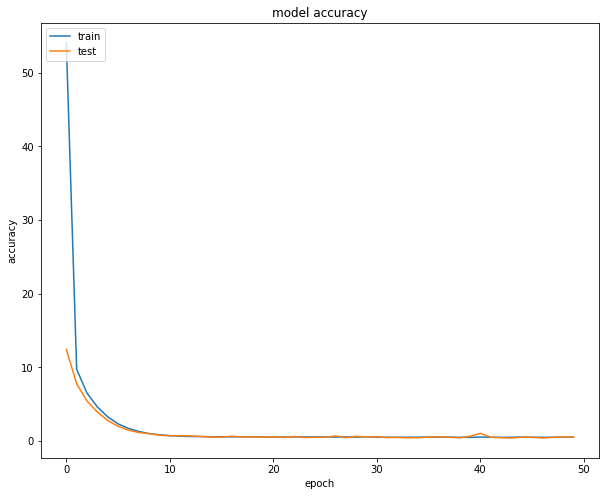

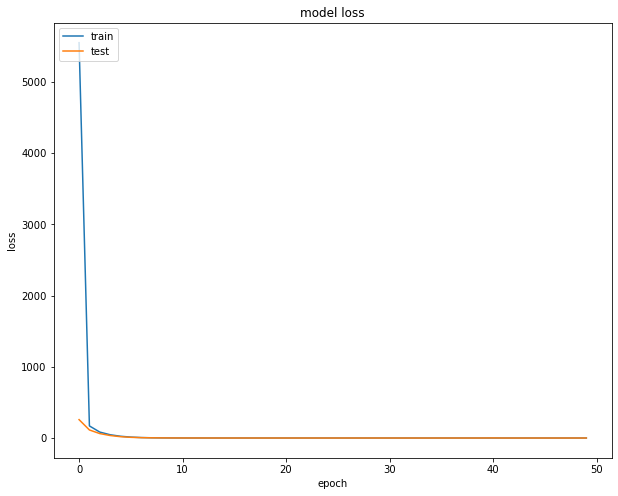

In [196]:
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize']= (5,4)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [197]:
from tensorflow.keras import activations

model = models.Sequential()
model.add(layers.Dense(64, activation='selu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='selu'))
model.add(layers.Dense(16, activation='selu'))
model.add(layers.Dense(1, activation='linear'))

In [198]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

In [199]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
376/376 [==============================] - 15s 12ms/step - loss: 5714.7568 - mae: 53.2319 - mape: 40.2938 - val_loss: 77.4238 - val_mae: 5.5545 - val_mape: 4.3332
Epoch 2/50
376/376 [==============================] - 3s 8ms/step - loss: 33.2006 - mae: 3.5964 - mape: 2.7925 - val_loss: 16.6996 - val_mae: 2.5853 - val_mape: 2.0040
Epoch 3/50
376/376 [==============================] - 3s 8ms/step - loss: 10.1081 - mae: 2.1130 - mape: 1.6170 - val_loss: 8.4349 - val_mae: 1.8291 - val_mape: 1.3914
Epoch 4/50
376/376 [==============================] - 3s 8ms/step - loss: 5.5593 - mae: 1.6133 - mape: 1.2207 - val_loss: 5.2670 - val_mae: 1.4555 - val_mape: 1.0971
Epoch 5/50
376/376 [==============================] - 3s 8ms/step - loss: 3.4270 - mae: 1.2885 - mape: 0.9684 - val_loss: 3.3890 - val_mae: 1.2368 - val_mape: 0.9321
Epoch 6/50
376/376 [==============================] - 3s 8ms/step - loss: 2.3478 - mae: 1.0802 - mape: 0.8098 - val_loss: 2.4488 - val_mae: 1.0583 - val_mape: 

376/376 [==============================] - 3s 7ms/step - loss: 0.4765 - mae: 0.5168 - mape: 0.3835 - val_loss: 0.4888 - val_mae: 0.4913 - val_mape: 0.3686


In [200]:
test_loss, test_mae, test_mape = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 5ms/step - loss: 0.4888 - mae: 0.4913 - mape: 0.3686


In [201]:
print("MSE: {:.2f}".format(test_loss))
print("MAE: {:.2f}".format(test_mae))
print("MAPE: {:.2%}".format(test_mape))

MSE: 0.49
MAE: 0.49
MAPE: 36.86%


In [226]:
from keras.layers import PReLU

model = models.Sequential()
model.add(layers.Dense(64, activation='PReLU', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(46,activation='PReLU'))
model.add(layers.Dense(32, activation='PReLU'))
model.add(layers.Dense(16, activation='PReLU'))
model.add(layers.Dense(1, activation='linear'))

In [228]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'mape'])

In [229]:
early_stopping = EarlyStopping(patience=5, monitor='val_loss')

In [209]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
376/376 [==============================] - 9s 10ms/step - loss: 2999.7710 - mae: 34.9253 - mape: 26.1249 - val_loss: 130.0176 - val_mae: 8.1816 - val_mape: 6.2089
Epoch 2/50
376/376 [==============================] - 2s 6ms/step - loss: 78.0279 - mae: 6.0607 - mape: 4.6141 - val_loss: 54.7975 - val_mae: 5.1330 - val_mape: 3.8741
Epoch 3/50
376/376 [==============================] - 3s 7ms/step - loss: 32.4558 - mae: 3.8224 - mape: 2.9109 - val_loss: 19.4763 - val_mae: 2.8407 - val_mape: 2.1836
Epoch 4/50
376/376 [==============================] - 3s 8ms/step - loss: 16.5034 - mae: 2.8999 - mape: 2.1938 - val_loss: 9.8464 - val_mae: 2.0403 - val_mape: 1.5710
Epoch 5/50
376/376 [==============================] - 2s 7ms/step - loss: 10.2804 - mae: 2.3659 - mape: 1.7788 - val_loss: 7.6258 - val_mae: 1.8973 - val_mape: 1.3997
Epoch 6/50
376/376 [==============================] - 3s 7ms/step - loss: 8.0645 - mae: 2.1486 - mape: 1.6088 - val_loss: 3.7500 - val_mae: 1.1680 - val_map

376/376 [==============================] - 3s 7ms/step - loss: 3.0819 - mae: 1.3301 - mape: 0.9807 - val_loss: 4.4553 - val_mae: 1.9226 - val_mape: 1.4268


In [210]:
test_loss, test_mae, test_mape = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 5ms/step - loss: 4.4553 - mae: 1.9226 - mape: 1.4268


In [211]:
print("MSE: {:.2f}".format(test_loss))
print("MAE: {:.2f}".format(test_mae))
print("MAPE: {:.2%}".format(test_mape))

MSE: 4.46
MAE: 1.92
MAPE: 142.68%


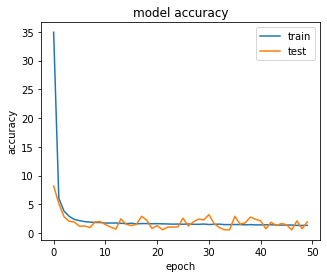

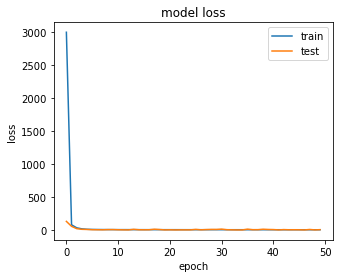

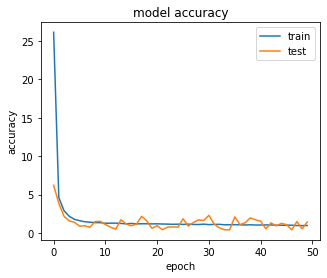

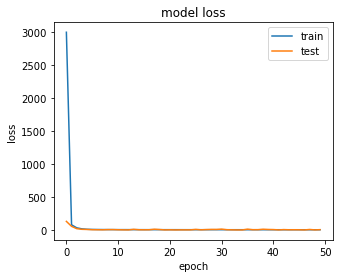

In [216]:
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize']= (5,4)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [3]:
f_fire = pd.read_csv('forestfires.csv')

In [4]:
f_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
f_fire.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
f_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
f_fire = f_fire.drop(f_fire.columns[11:30], axis=1)

In [8]:
f_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


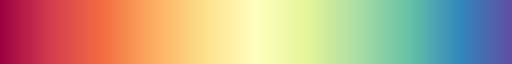

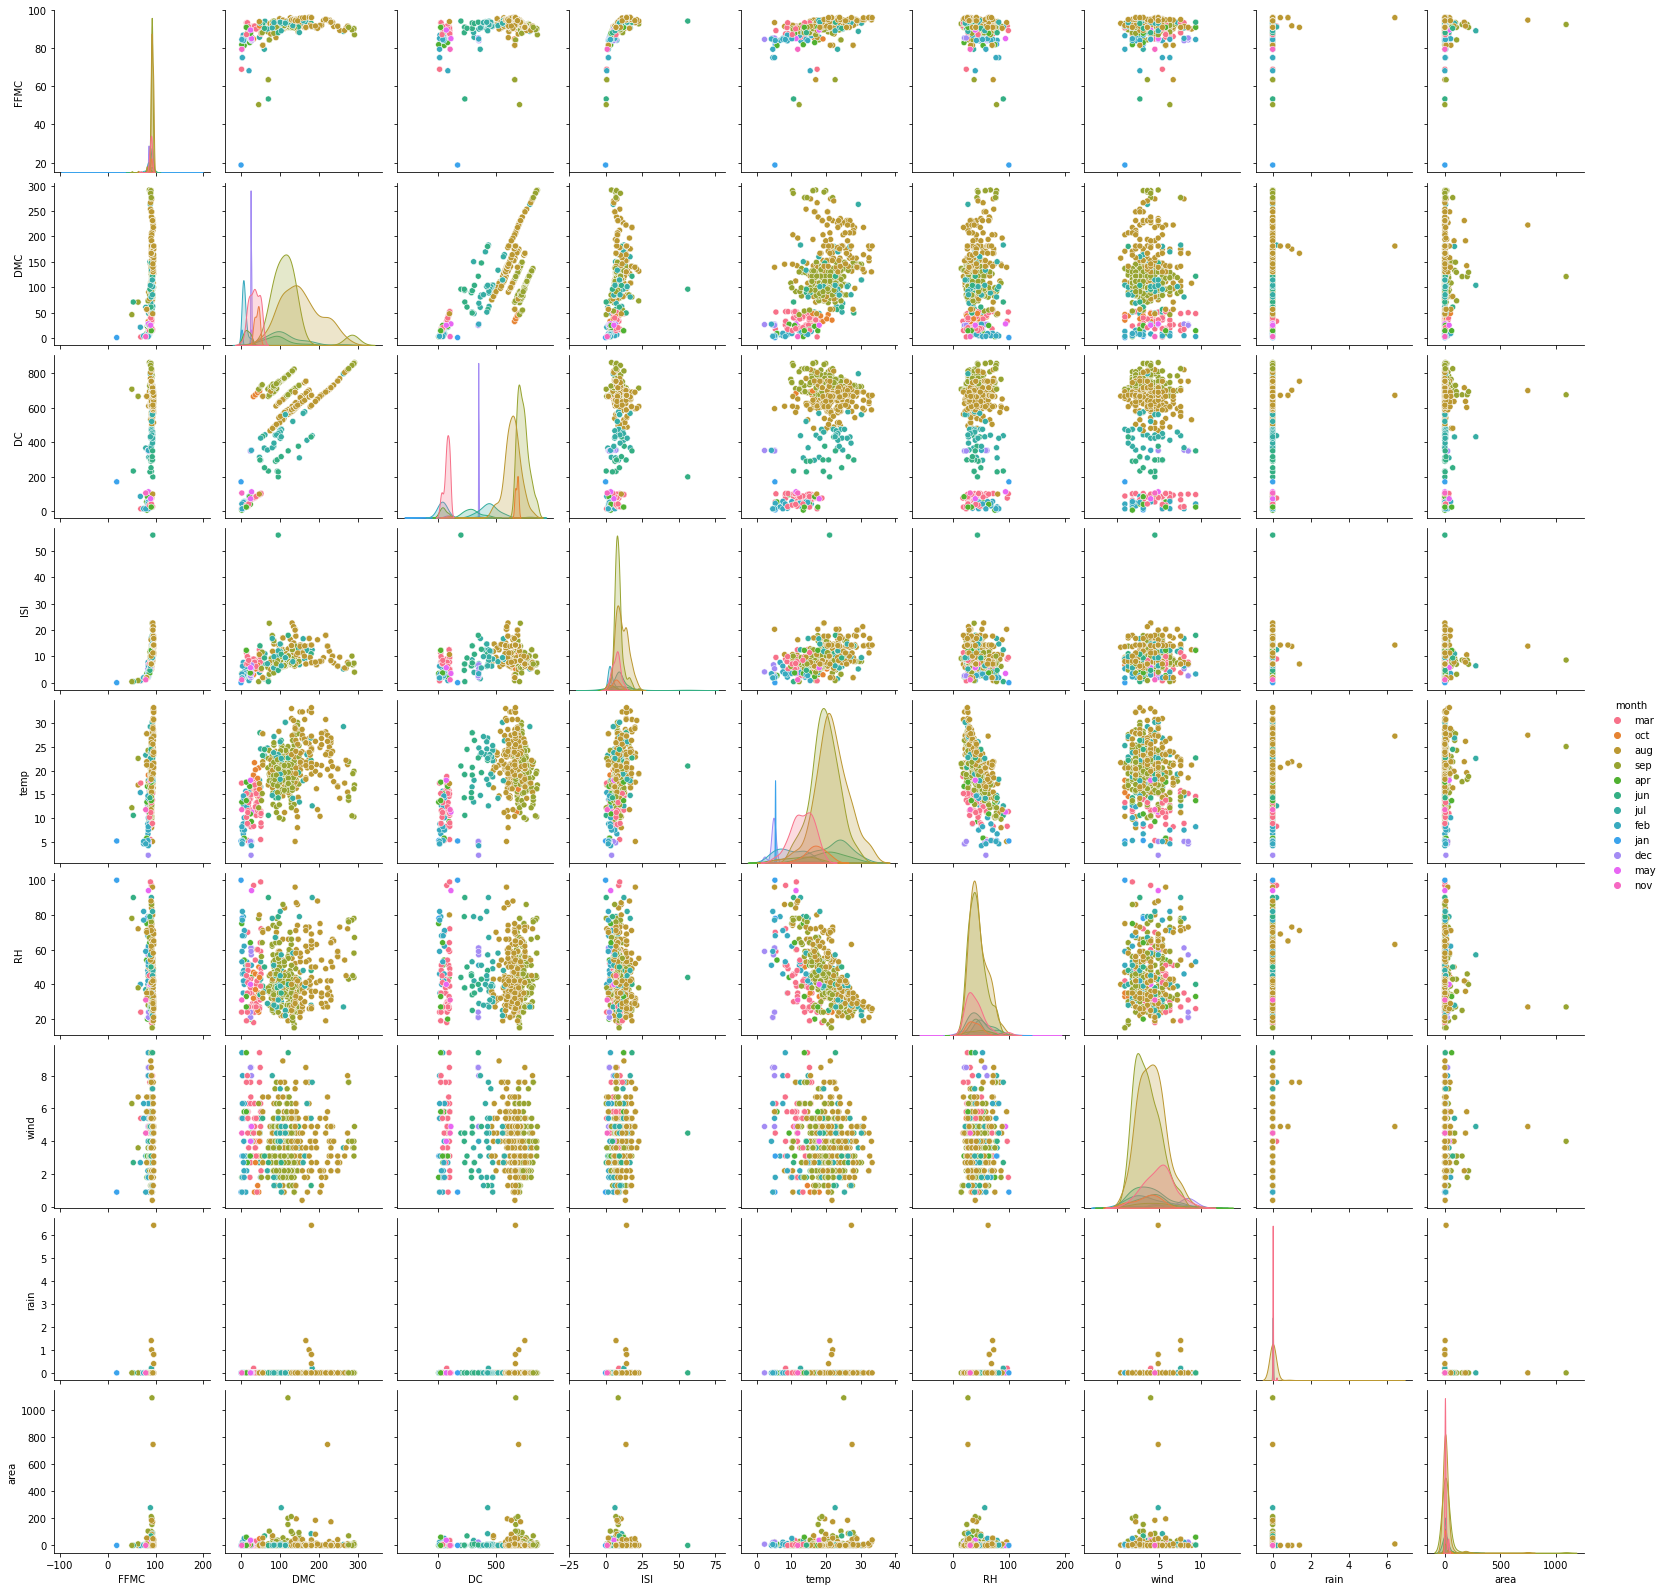

In [9]:
plt.rcParams['figure.figsize']=(20,15)
    
sns.pairplot(f_fire,hue="month")
sns.color_palette("Spectral", as_cmap=True)

<AxesSubplot:>

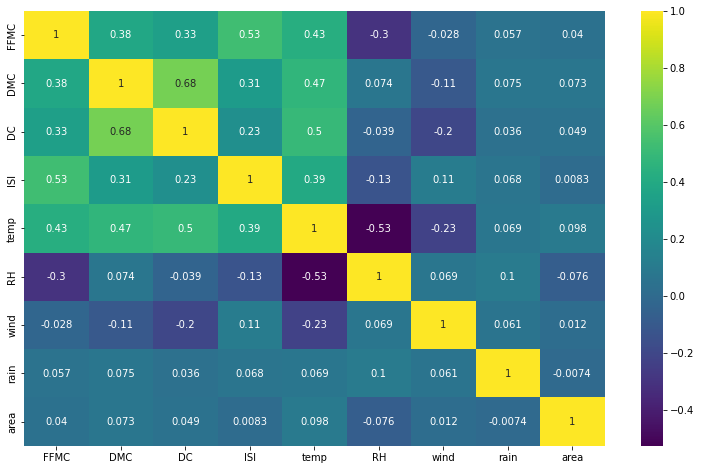

In [13]:
plt.rcParams['figure.figsize']=(13,8)
sns.heatmap(f_fire.corr(),annot = True, cmap = 'viridis')   
#sns.heatmap(f_fire.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,30]].corr(), annot =True, cmap = 'viridis')

In [48]:
num_zeros = len(f_fire[f_fire['area']==0])
print(num_zeros)

247


In [9]:
f_fire = f_fire.drop(f_fire[f_fire['area'] == 0].index)

In [10]:
f_fire['fire_area'] = np.log10(f_fire['area'] + 1)

f_fire.drop('area', axis=1, inplace=True)

In [11]:
f_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category,fire_area
138,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,small,0.133539
139,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,small,0.155336
140,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,small,0.167317
141,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,small,0.190332
142,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,small,0.206826
...,...,...,...,...,...,...,...,...,...,...,...,...
509,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,small,0.501059
510,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,small,0.155336
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large,0.871573
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large,1.742647


In [12]:
le = LabelEncoder()
f_fire['month'] = le.fit_transform(f_fire['month'])
f_fire['day'] = le.fit_transform(f_fire['day'])
f_fire['size_category'] = le.fit_transform(f_fire['size_category'])

In [13]:
f_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category,fire_area
138,4,5,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,1,0.133539
139,9,5,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,1,0.155336
140,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,1,0.167317
141,1,6,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,1,0.190332
142,1,0,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,1,0.206826
...,...,...,...,...,...,...,...,...,...,...,...,...
509,1,0,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,1,0.501059
510,1,0,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,1,0.155336
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,0.871573
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,1.742647


In [14]:
X = f_fire.drop('fire_area', axis=1)
y = f_fire['fire_area']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y,test_size=0.2, random_state=42)

In [17]:
Xtrain

array([[-1.0628831 , -0.92525324,  0.69309173, ..., -0.06005219,
        -0.07264838, -0.9707966 ],
       [-1.0628831 ,  1.62391385, -1.46781782, ..., -0.06005219,
        -0.07264838,  1.03008189],
       [ 1.18132755,  0.0944136 , -0.00920387, ...,  1.85374212,
        -0.07264838, -0.9707966 ],
       ...,
       [ 1.18132755,  0.60424701,  0.7201031 , ...,  0.41839639,
        -0.07264838, -0.9707966 ],
       [-1.0628831 ,  1.62391385,  0.55803488, ..., -1.97384649,
        -0.07264838,  1.03008189],
       [-1.0628831 ,  0.0944136 ,  0.20688708, ...,  1.85374212,
        -0.07264838,  1.03008189]])

In [18]:
Xtest

array([[ 3.39748557e-01, -1.43508666e+00,  4.48188646e-02,
        -1.07678986e+00, -2.06080080e+00,  8.02713487e-01,
        -7.63800075e-01, -1.17812963e+00,  2.81063927e+00,
        -7.26483754e-02,  1.03008189e+00],
       [-1.06288310e+00, -1.43508666e+00,  1.52864342e-01,
        -3.74201906e-02,  9.29173127e-03, -6.69226135e-02,
        -1.31503315e+00,  2.67515150e+00,  1.85374212e+00,
        -7.26483754e-02,  1.03008189e+00],
       [ 1.18132755e+00, -9.25253241e-01, -6.57476738e-01,
        -3.71445388e-01,  6.05663086e-01, -5.01740664e-01,
        -1.12048030e+00,  1.94435680e+00,  1.16264973e+00,
        -7.26483754e-02, -9.70796602e-01],
       [-7.82356770e-01,  1.62391385e+00, -1.89999973e+00,
        -1.40919357e+00, -9.42114432e-01, -9.36558714e-01,
        -2.30401013e+00,  1.14712622e+00,  2.06638593e+00,
        -7.26483754e-02, -9.70796602e-01],
       [-5.01830438e-01, -9.25253241e-01, -1.71092014e+00,
        -1.70592469e+00, -2.23287289e+00, -1.22643741e+00,
  

In [19]:
ytrain

260    0.993436
171    0.567026
370    1.081347
301    0.655138
391    1.493876
         ...   
158    0.421604
380    0.941014
209    1.387568
249    0.540329
244    0.587711
Name: fire_area, Length: 216, dtype: float64

In [20]:
ytest

168    0.547775
261    0.633468
217    1.495822
274    1.086004
390    1.039811
291    0.954243
415    2.873483
183    0.893762
333    0.495544
478    0.506505
368    1.134814
513    1.742647
450    0.870989
220    1.519434
345    0.834421
386    1.408070
444    1.039811
314    0.411620
246    0.037426
198    1.087781
436    0.187521
510    0.155336
184    0.900913
180    0.801404
374    1.285557
147    0.292256
160    0.439333
395    1.722469
252    0.082785
162    0.468347
257    0.225309
206    1.216166
307    0.790988
441    0.348305
485    0.487138
144    0.247973
265    0.252853
205    1.192289
264    0.877371
263    0.408240
163    0.469822
272    0.611723
475    0.622214
157    0.419956
215    1.472171
424    0.775246
228    1.813581
412    0.419956
231    1.983085
364    0.822822
153    0.390935
323    0.502427
462    0.673021
482    0.359835
Name: fire_area, dtype: float64

In [21]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

In [22]:
def create_model1(learning_rate, dropout_rate):
    model1 = Sequential()
    model1.add(layers.Dense(32, input_dim=Xtrain.shape[1], activation='relu'))
    model1.add(layers.Dropout(dropout_rate))
    model1.add(layers.Dense(16, activation='relu'))
    model1.add(layers.Dropout(dropout_rate))
    model1.add(layers.Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model1.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mape'])
    return model1

In [23]:
model = KerasRegressor(build_fn=create_model1, verbose=0)

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, dropout_rate=dropout_rate)

C:\Users\jaevi\AppData\Local\Temp\ipykernel_7112\1977944259.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model1, verbose=0)


In [24]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(Xtrain, ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.334220 using {'dropout_rate': 0.0, 'learning_rate': 0.01}


In [34]:
model_1 = create_model1(learning_rate=0.01, dropout_rate=0.0)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

history = model_1.fit(Xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

loss, mae, mape = model_1.evaluate(Xtest, ytest, verbose=0)
print("MSE:", loss)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.12349949032068253
MAE: 0.2676014006137848
MAPE: 64.66007232666016


In [35]:
y_pred = model_1.predict(Xtest)
r2_score(ytest, y_pred)

2/2 [==============================] - 0s 6ms/step


0.5934105132719416

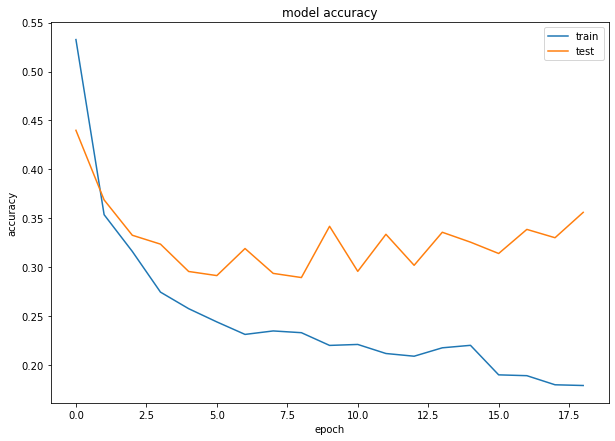

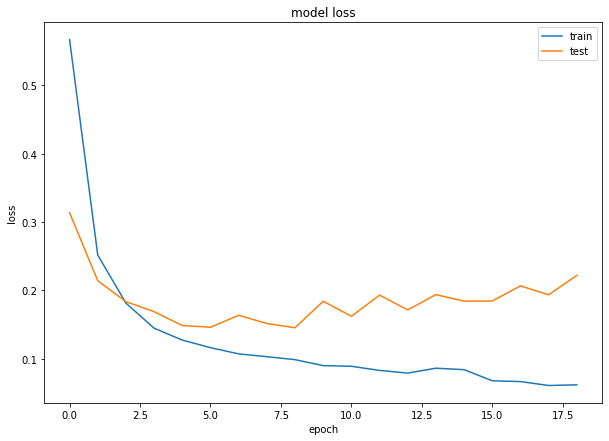

In [36]:
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize']= (10,7)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 0s/step


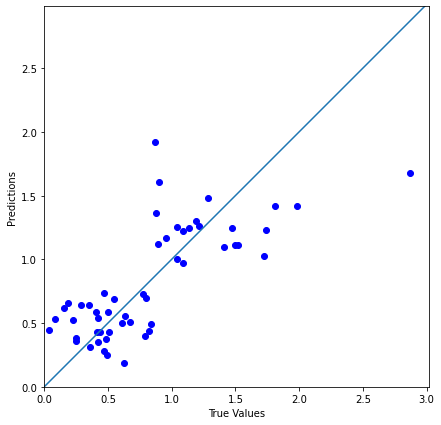

In [116]:
ypred = model_1.predict(Xtest)

plt.scatter(ytest, ypred, c='b')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()

In [74]:
def create_model2(learning_rate, dropout_rate):
    model2 = Sequential()
    model2.add(layers.Dense(64, input_dim=Xtrain.shape[1], activation='selu'))
    model2.add(layers.Dropout(dropout_rate))
    model2.add(layers.Dense(32, activation='selu'))
    model2.add(layers.Dropout(dropout_rate))
    model2.add(layers.Dense(16, activation='selu'))
    model2.add(layers.Dropout(dropout_rate))
    model2.add(layers.Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model2.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mape'])
    return model2

In [76]:
model = KerasRegressor(build_fn=create_model2, verbose=0)

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2, 0.3,0.4,0.5]
param_grid = dict(learning_rate=learning_rate, dropout_rate=dropout_rate)

C:\Users\jaevi\AppData\Local\Temp\ipykernel_7112\927733789.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model2, verbose=0)


In [77]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(Xtrain, ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.452501 using {'dropout_rate': 0.2, 'learning_rate': 0.01}


In [78]:
model_2 = create_model2(learning_rate=0.01, dropout_rate=0.2)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

history = model_2.fit(Xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

loss, mae, mape = model_2.evaluate(Xtest, ytest, verbose=0)
print("MSE:", loss)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.11194895952939987
MAE: 0.23984752595424652
MAPE: 74.6364517211914


In [79]:
y_pred = model_2.predict(Xtest)
r2_score(ytest, y_pred)

2/2 [==============================] - 0s 8ms/step


0.6314375463007615

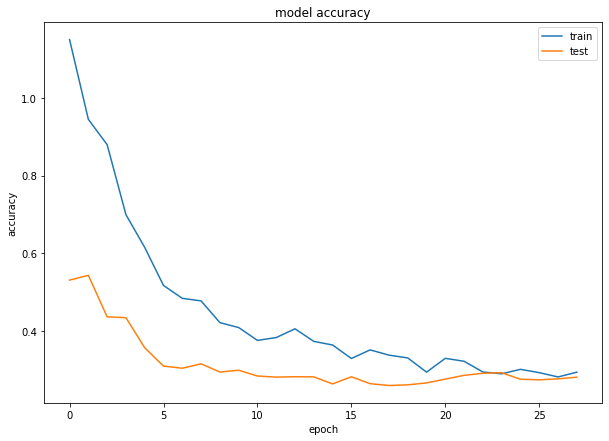

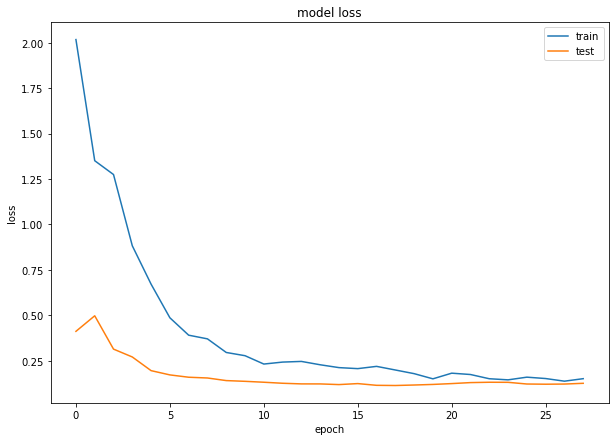

In [81]:
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize']= (10,7)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 6ms/step


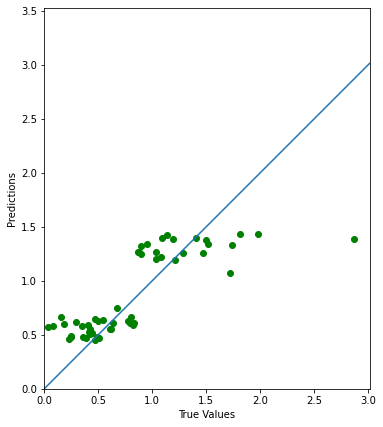

In [114]:
ypred = model_2.predict(Xtest)

plt.scatter(ytest, ypred, c='g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()

In [96]:
def create_model3(learning_rate, dropout_rate):
    model3 = Sequential()
    model3.add(layers.Dense(64, input_dim=Xtrain.shape[1], activation='PReLU'))
    model3.add(layers.Dropout(dropout_rate))
    model3.add(layers.Dense(32, activation='PReLU'))
    model3.add(layers.Dropout(dropout_rate))
    model3.add(layers.Dense(16, activation='PReLU'))
    model3.add(layers.Dropout(dropout_rate))
    model3.add(layers.Dense(1, activation='linear'))
    
    optimizer = RMSprop(learning_rate=learning_rate)
    
    model3.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mape'])
    return model3

In [97]:
model = KerasRegressor(build_fn=create_model3, verbose=0)

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2, 0.3,0.4,0.5]
param_grid = dict(learning_rate=learning_rate, dropout_rate=dropout_rate)

C:\Users\jaevi\AppData\Local\Temp\ipykernel_7112\1772778457.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model3, verbose=0)


In [98]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(Xtrain, ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.261909 using {'dropout_rate': 0.0, 'learning_rate': 0.01}


In [99]:
model_3 = create_model3(learning_rate=0.01, dropout_rate=0.0)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

history = model_3.fit(Xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

loss, mae, mape = model_3.evaluate(Xtest, ytest, verbose=0)
print("MSE:", loss)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.12839725613594055
MAE: 0.26966115832328796
MAPE: 67.43692016601562


In [100]:
ypred = model_3.predict(Xtest)
r2_score(ytest, y_pred)

2/2 [==============================] - 0s 6ms/step


0.6314375463007615

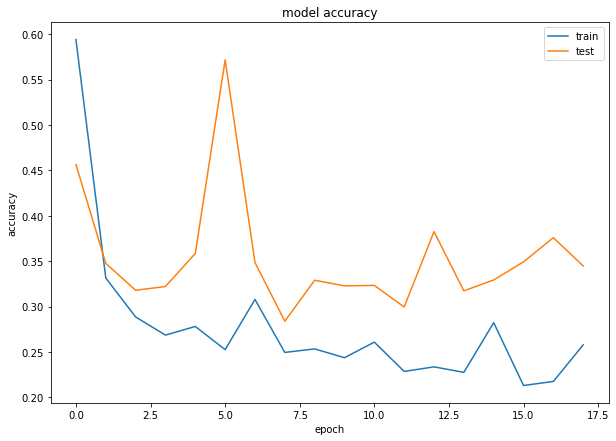

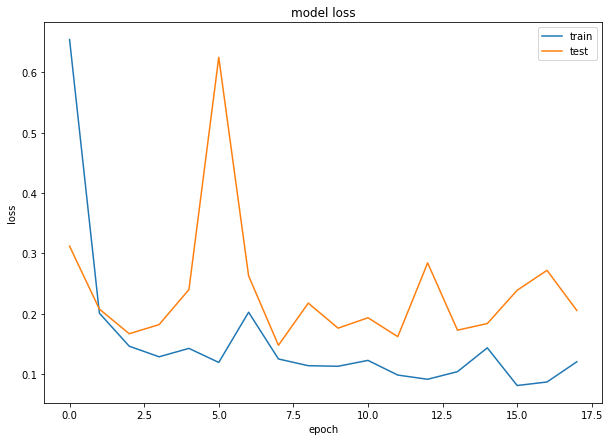

In [117]:
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize']= (10,7)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

2/2 [==============================] - 0s 6ms/step


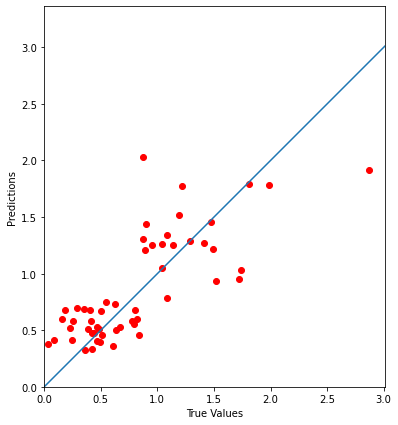

In [112]:
ypred = model_3.predict(Xtest)

plt.scatter(ytest, ypred, c='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()